In [24]:
# %% Load packages
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import cm
from sklearn.datasets import make_moons, make_circles, make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from models.load import get_classification_models
from models.linear import KernelHebbian
from experiments.evaluation import plot_scores, display_stats, plot_ci, plot_ci_all
from datasets.load import load_classification_datasets, print_stats, get_stats, get_dataset_stats
from models.kernel import KernelProjection

plt.style.use('ggplot')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Construct gaussian quantiles dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X_q = np.concatenate((X1, X2))
y_q = np.concatenate((y1, - y2 + 1))
y_q = pd.Series(y_q).map({0:-1,1:1}).to_numpy()

# Moons dataset
X_m, y_m = make_moons(200, random_state=1234,noise=0.1)
y_m = pd.Series(y_m).map({0:-1,1:1}).to_numpy()

# Circles dataset
X_c, y_c = make_circles(200, noise=0.2, factor=0.5, random_state=1)
y_c = pd.Series(y_c).map({0:-1,1:1}).to_numpy()


In [7]:
models = get_classification_models()
cmap = cm.get_cmap('Accent', len(models))

In [8]:
def plot_toy_dataset(X, y, models):
    # and plot
    fig, ax = plt.subplots(figsize=(8,6))

    t_class0 = y == -1
    t_class1 = y == 1
    ax.scatter(X[t_class0, 0], X[t_class0, 1], color='red')
    ax.scatter(X[t_class1, 0], X[t_class1, 1], color='blue')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    x1 = np.arange(np.min(X[:,0])*0.9, np.max(X[:,0])*1.1, step=0.05)
    x2 = np.arange(np.min(X[:,1])*0.9, np.max(X[:,1])*1.1, step=0.05)

    xx, yy = np.meshgrid(x1, x2)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
        
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))

    # plot each decision boundary
    i = 0
    model_color = []
    for name, model, _ in models:
        model.fit(X, y) 
        y_hat = model.predict(grid)
        zz = y_hat.reshape(xx.shape)
        color = cmap(i)
        cs = ax.contour(xx, yy, zz, colors=[color])

        proxy = plt.Rectangle((0,0),1,1,fc=color)
        model_color.append((name, color, proxy))

        i = i + 1
    
    ax.legend([x[2] for x in model_color],[x[0] for x in model_color])
    fig.show()
    return model_color

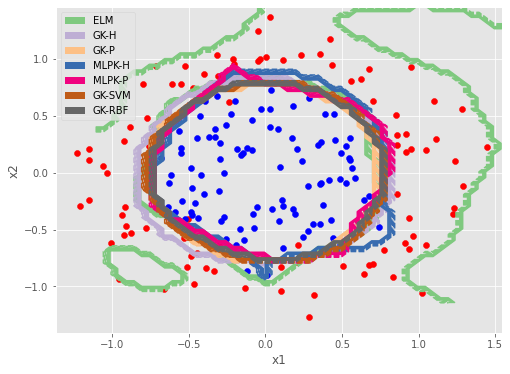

In [9]:
m_color_circles = plot_toy_dataset(X_c,y_c,models)

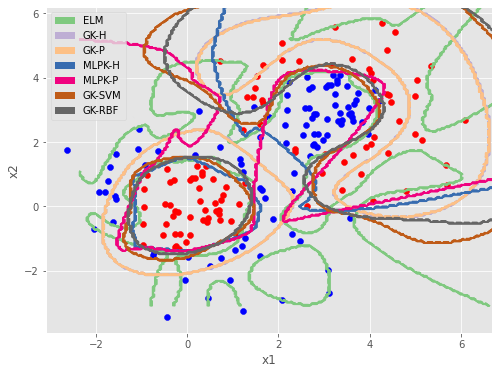

In [10]:
m_color_quantile = plot_toy_dataset(X_q,y_q,models)

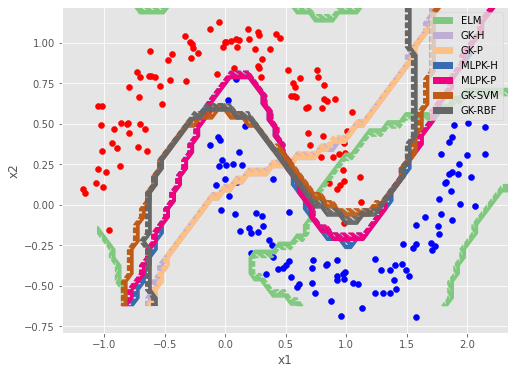

In [11]:
m_color_moons = plot_toy_dataset(X_m,y_m,models)

In [12]:
path_class = '/home/victor/git/rna-ppgee/artigo3/report/figures/classification_experiment_chart_data.csv'
#save_path = '/home/victor/git/rna-ppgee/artigo3/report'

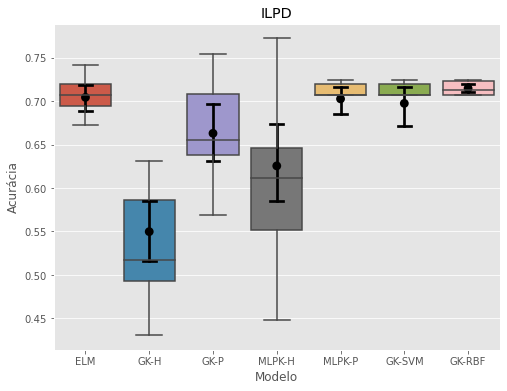

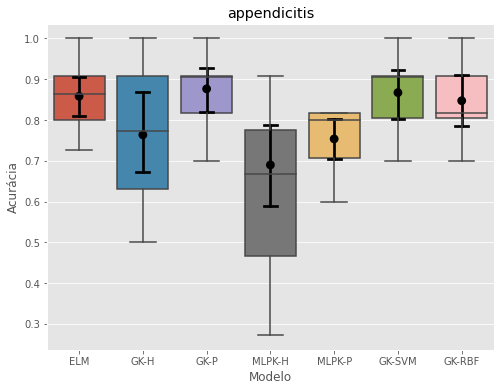

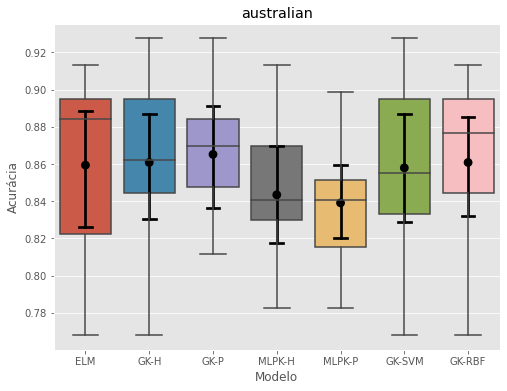

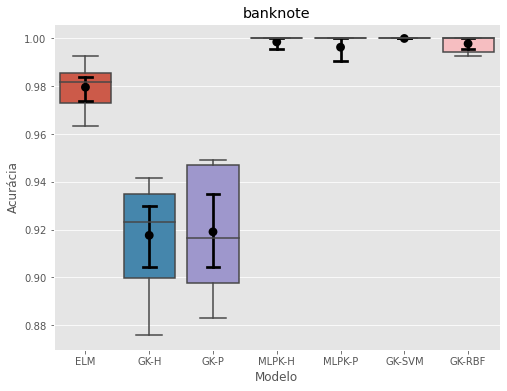

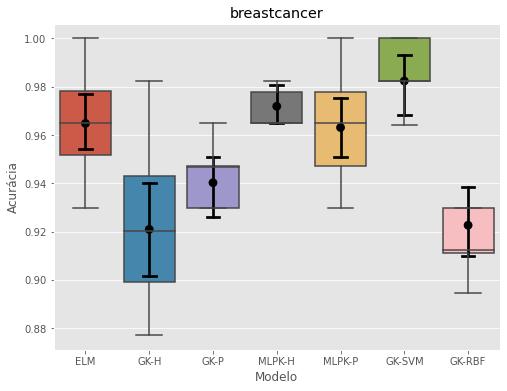

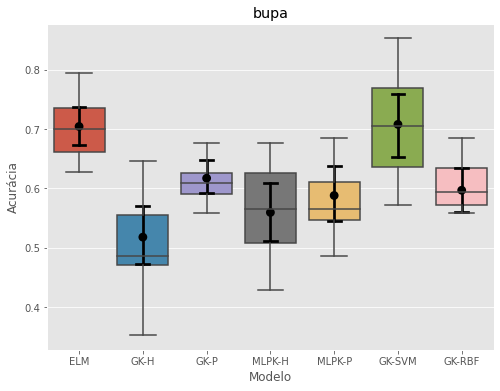

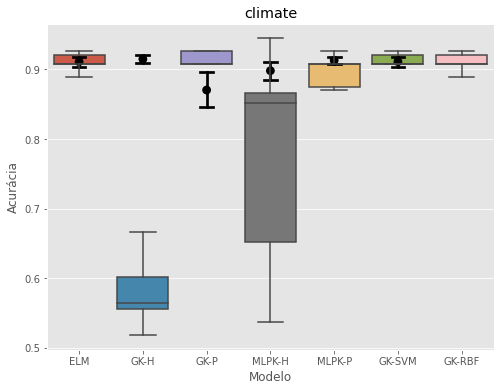

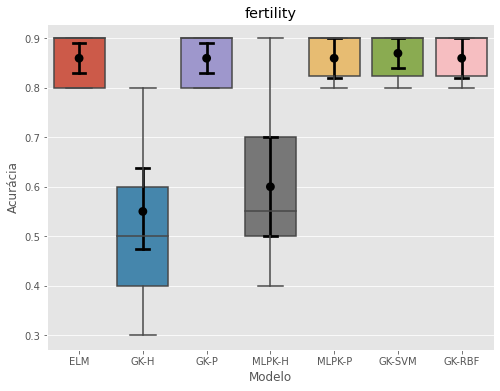

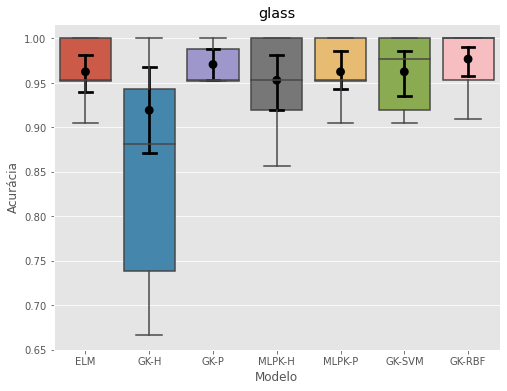

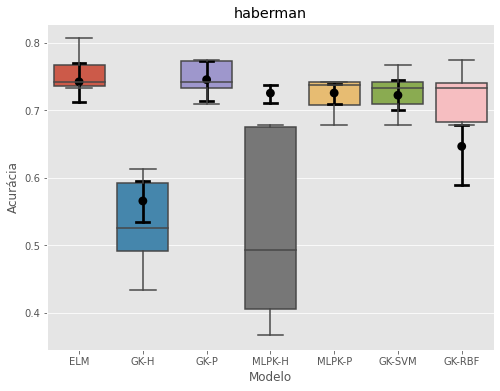

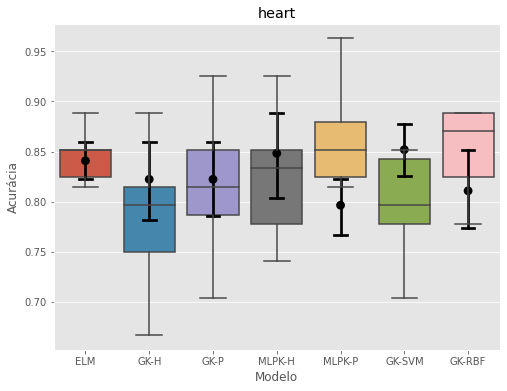

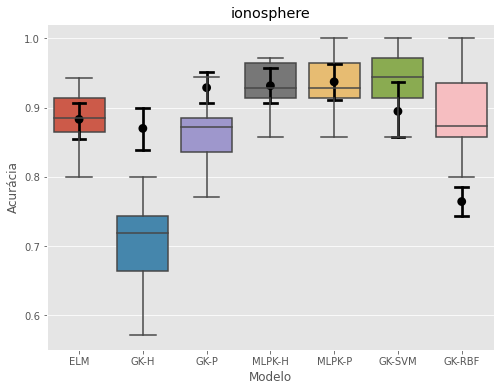

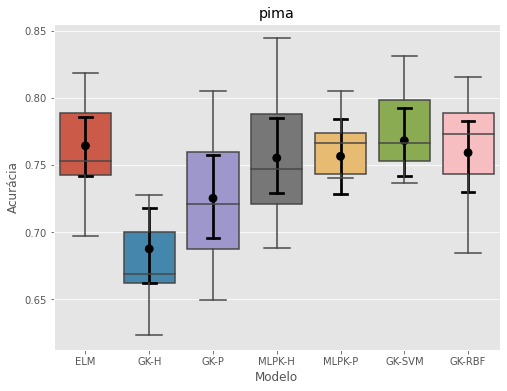

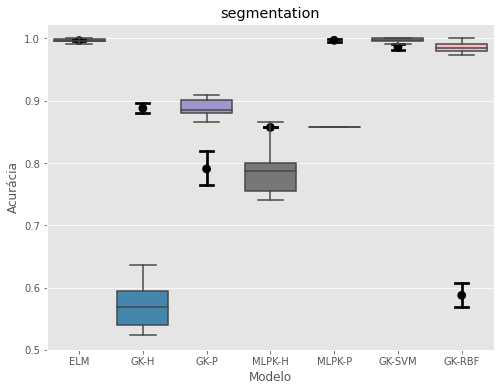

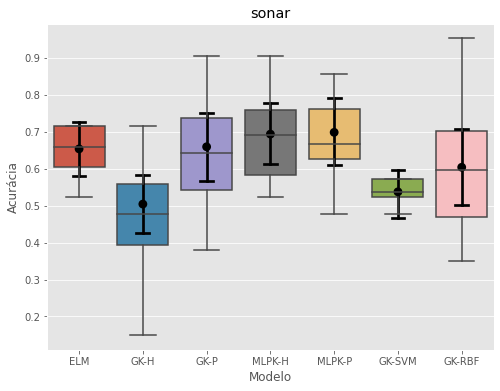

In [13]:
plot_ci(path_class, 'Acurácia', 'Modelo')

In [16]:
display_stats(path_class, 'Acurácia', 'std', None)

model_name
ELM       84.845 ± 11.237
GK-H      67.820 ± 18.290
GK-P      82.117 ± 11.803
GK-RBF    83.973 ± 13.022
GK-SVM    84.498 ± 13.326
MLPK-H    76.315 ± 18.153
MLPK-P    82.538 ± 12.751
Name: score, dtype: object


score                                    \
model_name               ELM             GK-H             GK-P   
dataset                                                          
ILPD          70.965 ± 1.889   52.952 ± 6.197   66.289 ± 5.396   
appendicitis  85.818 ± 7.705  76.364 ± 16.318   87.636 ± 8.835   
australian    85.942 ± 5.064   86.087 ± 4.727   87.601 ± 3.491   
banknote      97.959 ± 0.850   91.761 ± 2.124   91.908 ± 2.499   
breastcancer  96.482 ± 1.931   92.093 ± 3.160   94.531 ± 1.292   
bupa          70.454 ± 5.191   50.143 ± 8.406   60.654 ± 3.258   
climate       91.111 ± 1.111   57.593 ± 4.095   91.481 ± 0.907   
fertility     86.000 ± 4.899  52.222 ± 13.966   86.000 ± 4.899   
glass         96.255 ± 3.490  86.845 ± 11.209   97.078 ± 2.265   
haberman      76.237 ± 2.620   53.591 ± 5.800   74.691 ± 2.146   
heart         84.774 ± 2.098   78.189 ± 5.906   82.222 ± 5.926   
ionosphere    88.310 ± 4.149   70.079 ± 6.931   87.002 ± 4.715   
pima          76.422 ± 3.591   67.439 ± 2.860   72.517 ± 4.860   
segmentation  99.654 ± 0.260   57.056 ± 3.457   88.788 ± 1.455   
sonar         65.030 ± 6.330  46.881 ± 15.892  65.926 ± 14.698   

                                                                 \
model_name             GK-RBF           GK-SVM           MLPK-H   
dataset                                                           
ILPD           71.455 ± 0.783   71.431 ± 0.761   60.771 ± 8.558   
appendicitis  84.727 ± 10.122   86.727 ± 9.801  61.545 ± 19.905   
australian     86.087 ± 4.453   85.797 ± 4.798   85.185 ± 3.535   
banknote       99.781 ± 0.334  100.000 ± 0.000  100.000 ± 0.000   
breastcancer   91.208 ± 1.242   98.823 ± 1.184   96.878 ± 0.723   
bupa           61.102 ± 4.445   70.807 ± 8.441   55.958 ± 7.824   
climate        91.111 ± 1.111   91.296 ± 0.849  78.148 ± 13.952   
fertility      87.778 ± 4.157   87.000 ± 4.583  60.000 ± 16.125   
glass          97.684 ± 3.082   96.255 ± 4.089   95.303 ± 4.720   
haberman       72.226 ± 3.560   72.559 ± 2.468  52.570 ± 12.887   
heart          85.185 ± 4.382   79.630 ± 4.757   82.222 ± 5.926   
ionosphere     89.468 ± 6.500   93.730 ± 4.202   92.889 ± 3.634   
pima           75.909 ± 4.156   77.740 ± 2.887   75.518 ± 4.438   
segmentation   98.615 ± 0.794   99.697 ± 0.338   78.163 ± 3.708   
sonar         60.381 ± 17.003   53.899 ± 3.145  69.357 ± 13.203   

                               
model_name             MLPK-P  
dataset                        
ILPD           71.431 ± 0.761  
appendicitis   75.364 ± 7.867  
australian     83.913 ± 3.270  
banknote      100.000 ± 0.000  
breastcancer   96.313 ± 1.990  
bupa           57.096 ± 5.346  
climate        89.815 ± 2.070  
fertility      87.778 ± 4.157  
glass          96.255 ± 3.490  
haberman       72.538 ± 2.255  
heart          87.500 ± 4.512  
ionosphere     93.175 ± 4.046  
pima           76.767 ± 1.870  
segmentation   85.714 ± 0.000  
sonar         66.481 ± 11.236

In [17]:
display_stats(path_class, 'Acurácia', 'ci', None)

model_name
ELM       84.84 (83.11,86.67)
GK-H      67.82 (65.03,70.70)
GK-P      82.12 (80.21,84.02)
GK-RBF    83.97 (81.95,86.03)
GK-SVM    84.50 (82.31,86.74)
MLPK-H    76.31 (73.50,79.28)
MLPK-P    82.54 (80.41,84.54)
Name: score, dtype: object


score                                            \
model_name                    ELM                 GK-H                 GK-P   
dataset                                                                       
ILPD          70.97 (69.82,72.25)  52.95 (49.16,56.68)  66.29 (62.81,69.70)   
appendicitis  85.82 (80.91,90.18)  76.36 (67.36,87.28)  87.64 (81.82,93.55)   
australian    85.94 (82.90,88.99)  86.09 (83.33,89.28)  87.60 (85.35,89.86)   
banknote      97.96 (97.45,98.54)  91.76 (90.59,93.08)  91.91 (90.38,93.38)   
breastcancer  96.48 (95.42,97.71)  92.09 (89.99,94.02)  94.53 (93.74,95.31)   
bupa          70.45 (67.27,73.77)  50.14 (44.87,55.50)  60.65 (58.37,62.64)   
climate       91.11 (90.37,91.85)  57.59 (55.00,59.81)  91.48 (90.93,92.04)   
fertility     86.00 (83.00,89.00)  52.22 (43.31,61.11)  86.00 (83.00,89.00)   
glass         96.26 (93.94,98.57)  86.84 (80.45,94.25)  97.08 (95.35,98.78)   
haberman      76.24 (74.29,78.08)  53.59 (50.16,56.90)  74.69 (73.27,76.21)   
heart         84.77 (83.54,86.42)  78.19 (74.48,82.30)  82.22 (78.52,85.93)   
ionosphere    88.31 (86.02,91.19)  70.08 (65.87,74.29)  87.00 (84.11,90.19)   
pima          76.42 (74.14,78.74)  67.44 (65.61,69.27)  72.52 (69.53,75.50)   
segmentation  99.65 (99.48,99.78)  57.06 (54.85,58.96)  88.79 (87.88,89.74)   
sonar         65.03 (61.22,69.58)  46.88 (37.50,56.26)  65.93 (56.72,76.72)   

                                                            \
model_name                  GK-RBF                  GK-SVM   
dataset                                                      
ILPD           71.45 (70.94,71.92)     71.43 (70.84,71.96)   
appendicitis   84.73 (78.36,91.45)     86.73 (81.09,93.18)   
australian     86.09 (83.48,88.84)     85.80 (83.19,88.55)   
banknote      99.78 (99.56,100.00)  100.00 (100.00,100.00)   
breastcancer   91.21 (90.31,92.07)     98.82 (98.04,99.62)   
bupa           61.10 (58.10,64.01)     70.81 (65.45,76.14)   
climate        91.11 (90.37,91.85)     91.30 (90.74,91.67)   
fertility      87.78 (85.56,91.11)     87.00 (84.00,90.00)   
glass          97.68 (95.84,99.55)     96.26 (93.92,99.05)   
haberman       72.23 (70.11,74.42)     72.56 (71.11,74.18)   
heart          85.19 (82.59,88.15)     79.63 (76.67,82.60)   
ionosphere     89.47 (84.94,93.18)     93.73 (91.17,96.59)   
pima           75.91 (73.45,78.50)     77.74 (75.72,79.51)   
segmentation   98.61 (98.14,99.09)     99.70 (99.52,99.91)   
sonar          60.38 (50.07,70.53)     53.90 (51.85,56.02)   

                                                              
model_name                    MLPK-H                  MLPK-P  
dataset                                                       
ILPD             60.77 (55.21,66.37)     71.43 (70.94,71.96)  
appendicitis     61.55 (49.82,72.18)     75.36 (70.82,80.55)  
australian       85.19 (82.93,87.60)     83.91 (81.88,85.80)  
banknote      100.00 (100.00,100.00)  100.00 (100.00,100.00)  
breastcancer     96.88 (96.30,97.26)     96.31 (95.08,97.54)  
bupa             55.96 (51.28,60.73)     57.10 (53.33,60.46)  
climate          78.15 (70.19,87.22)     89.81 (88.70,91.11)  
fertility        60.00 (49.00,69.03)     87.78 (85.56,91.11)  
glass            95.30 (92.49,98.16)     96.26 (94.35,98.57)  
haberman         52.57 (44.73,60.56)     72.54 (71.31,74.08)  
heart            82.22 (78.52,85.56)     87.50 (84.26,90.28)  
ionosphere       92.89 (90.89,95.17)     93.17 (90.63,95.75)  
pima             75.52 (72.62,78.29)     76.77 (75.32,78.02)  
segmentation     78.16 (75.81,80.28)     85.71 (85.71,85.71)  
sonar            69.36 (61.14,77.29)     66.48 (59.42,74.42)

In [41]:
# load all datasets
def plot_hebbian_surface(datasets, kernels=['gaussian','mlp']):
    for name, ds in datasets:
        _, _, proportion = get_dataset_stats(ds)
        fig, ax = plt.subplots(1, len(kernels), figsize=(14,6))
        fig.suptitle(f'{name}, proportion={proportion}')

        # get the statistics
        for index, kernel in enumerate(kernels):
            X, y = ds
            model = KernelHebbian(kernel).fit(X, y)
            H = model.kernel_projection_.H_ #KernelProjection('gaussian').fit(X, y)
            H = StandardScaler().fit_transform(H)
            crosstalk = model.kernel_projection_.calculate_crosstalk()

            x = np.linspace(-3, 3, 100)

            xx, yy = np.meshgrid(x, x)
            # flatten each grid to a vector
            r1, r2 = xx.flatten(), yy.flatten()
            r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
                
            # horizontal stack vectors to create x1,x2 input for the model
            grid = np.hstack((r1,r2))
            y_hat = np.sign(grid @ model.coef_)

            acc = accuracy_score(y, model.predict(X))

            t_class0 = y == -1
            t_class1 = y == 1
            ax[index].scatter(H[t_class0, 0], H[t_class0, 1], color='red')
            ax[index].scatter(H[t_class1, 0], H[t_class1, 1], color='blue')
            
            zz = y_hat.reshape(xx.shape)
            cs = ax[index].contour(xx, yy, zz)

            proxy = plt.Rectangle((0,0),1,1,fc='black')

            ax[index].set_xlabel('x1')
            ax[index].set_ylabel('x2')
            ax[index].set_title(f'{kernel}: accuracy={100*acc:.2f}%; crosstalk={crosstalk:.2f}')
            ax[index].legend([proxy], [f'coefs: {model.coef_}'])
        fig.tight_layout()
        fig.show()
        

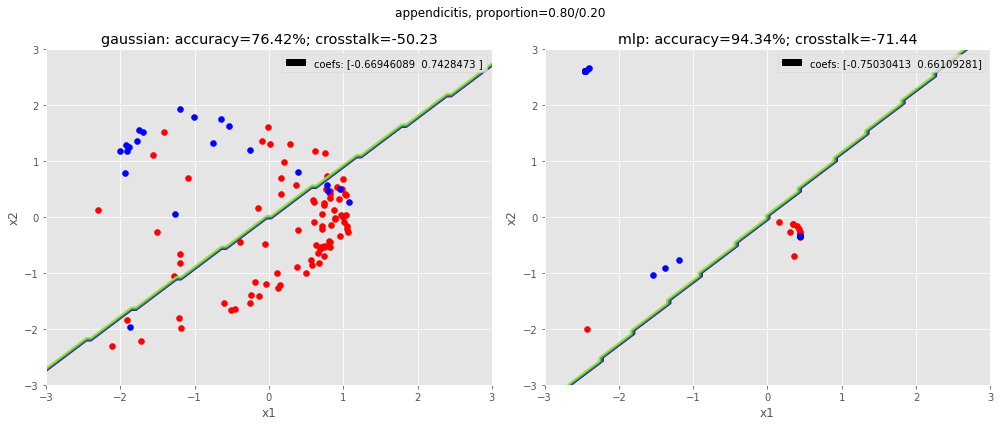

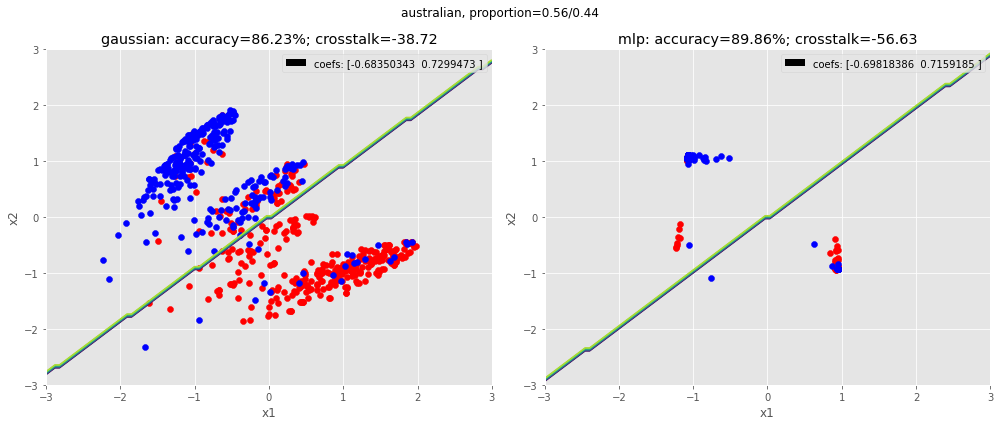

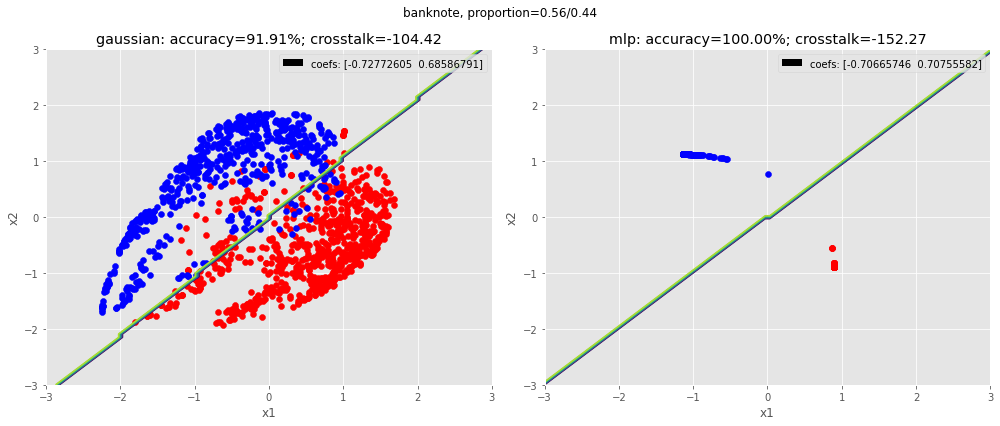

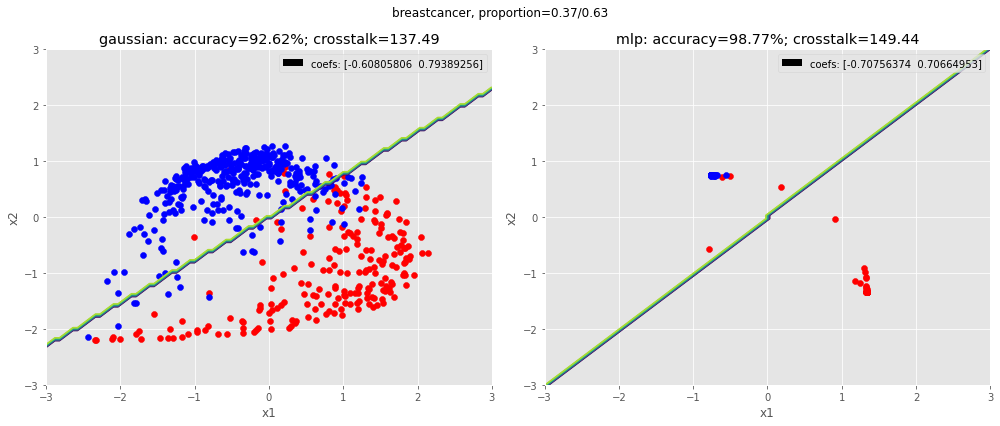

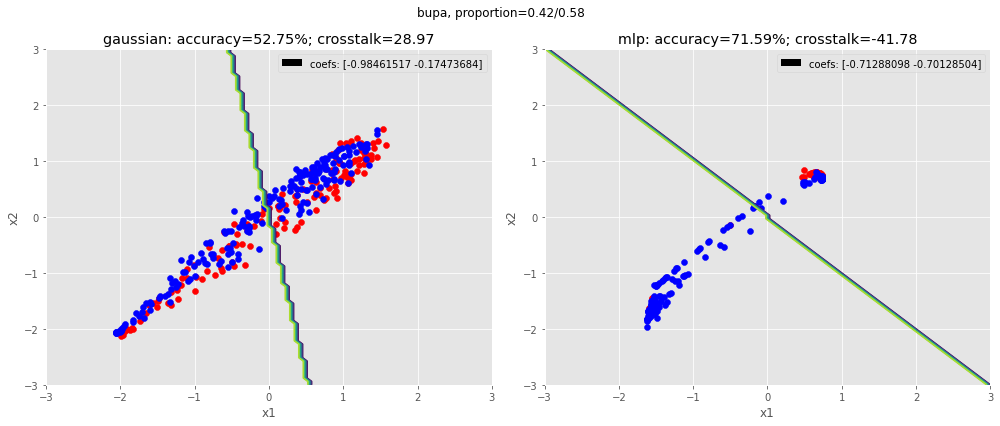

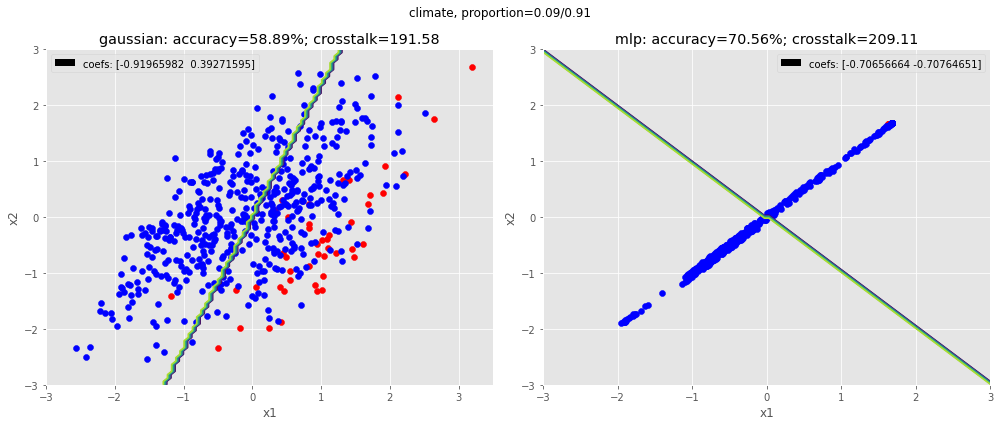

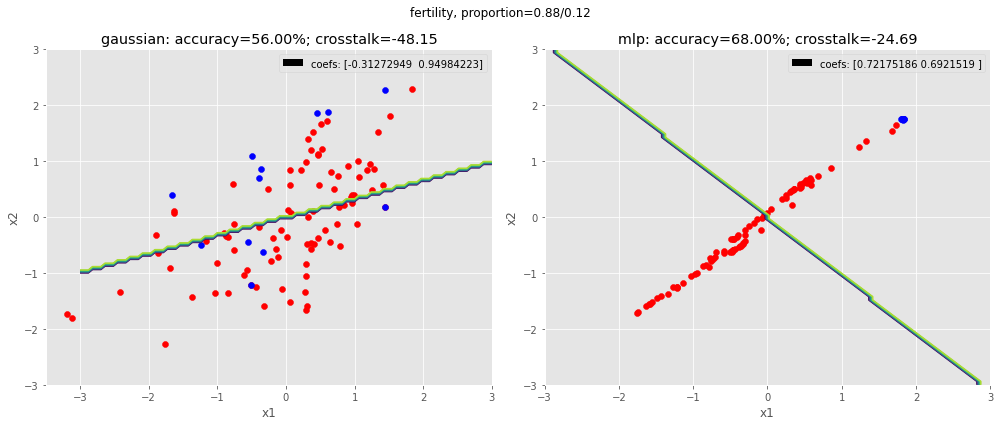

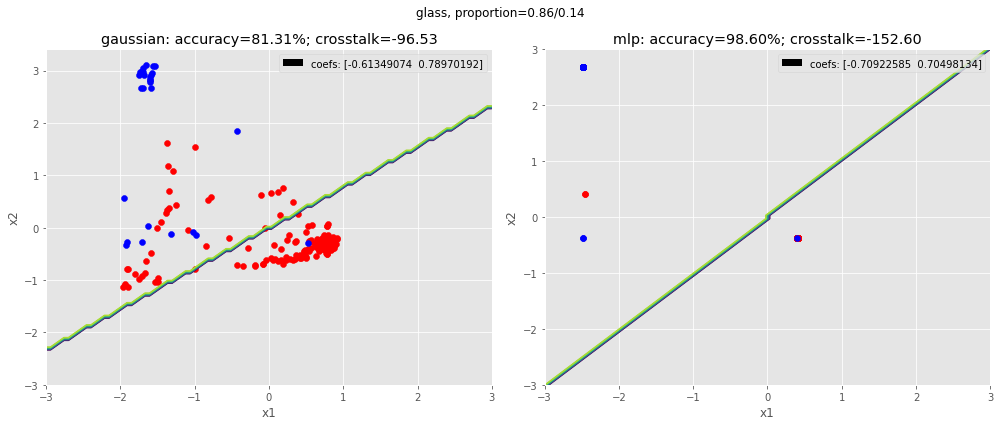

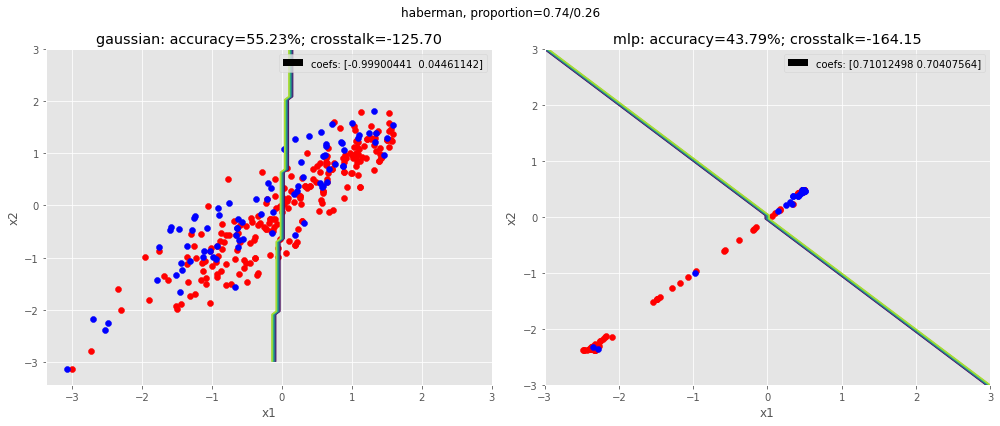

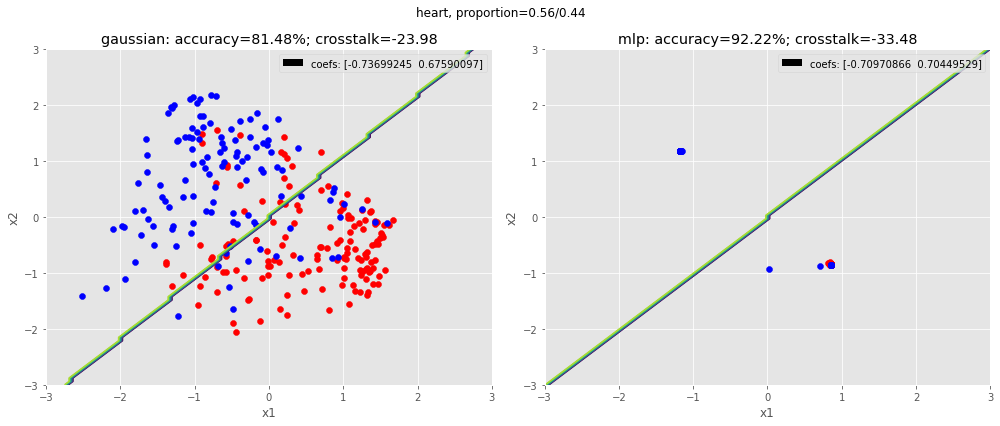

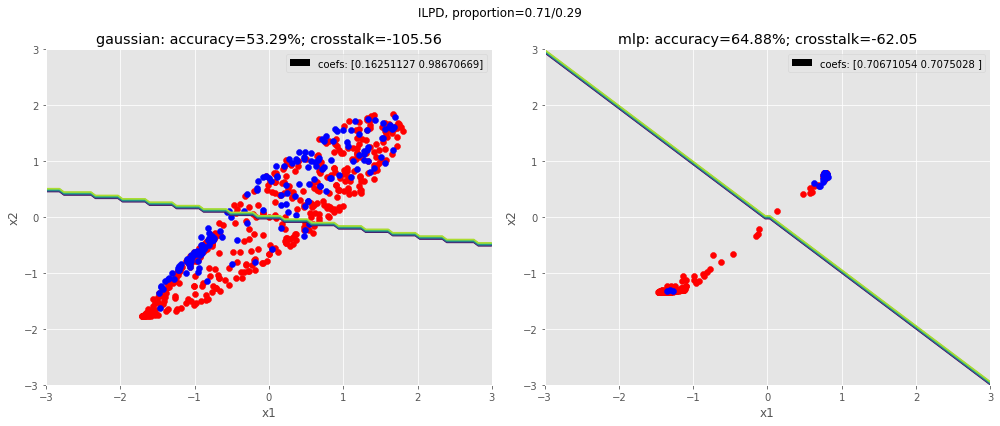

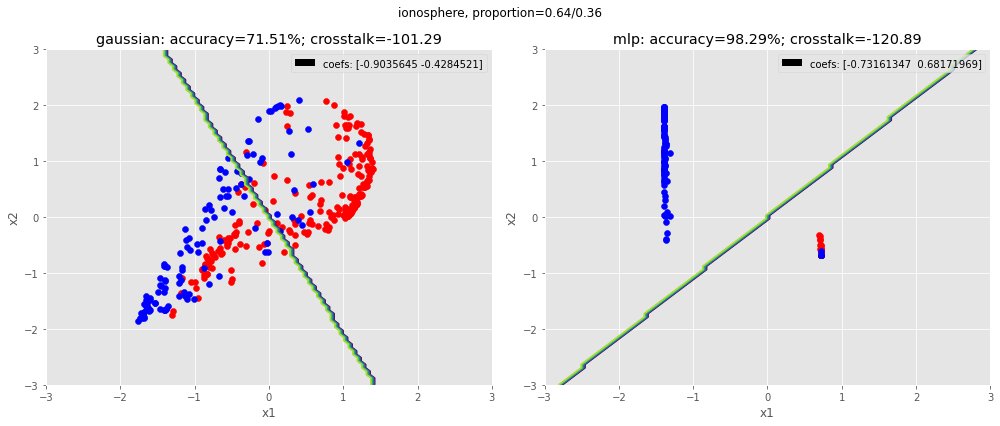

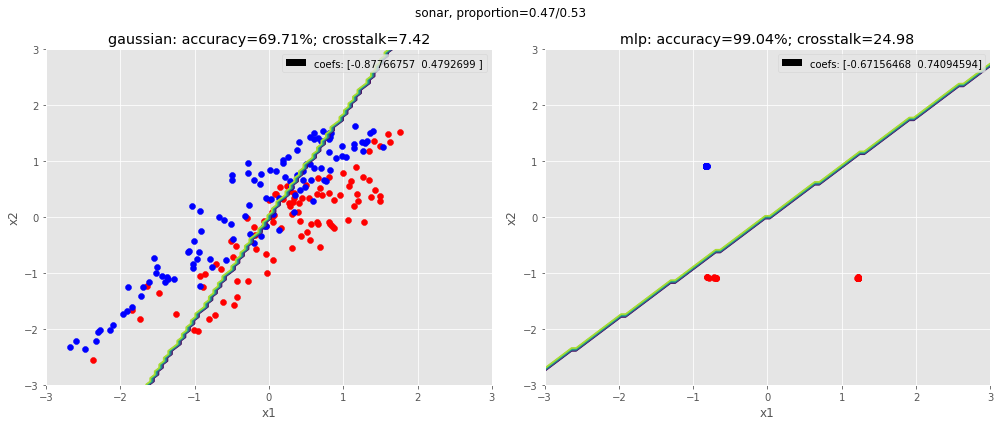

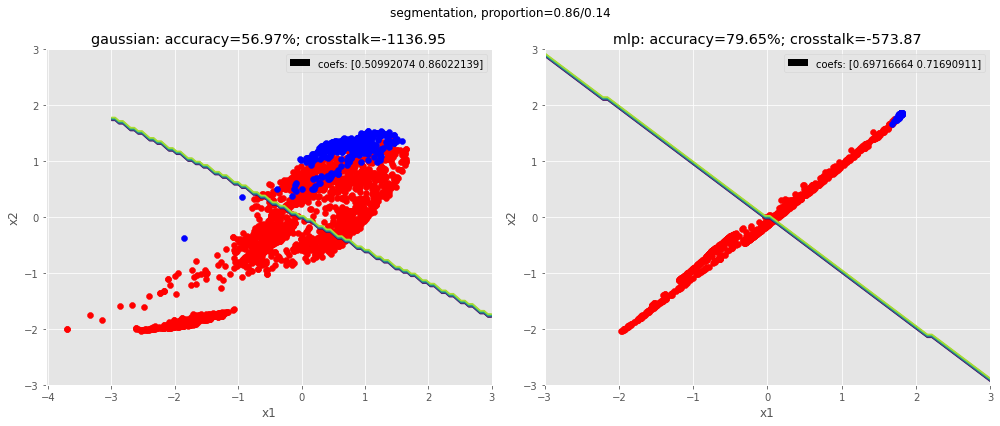

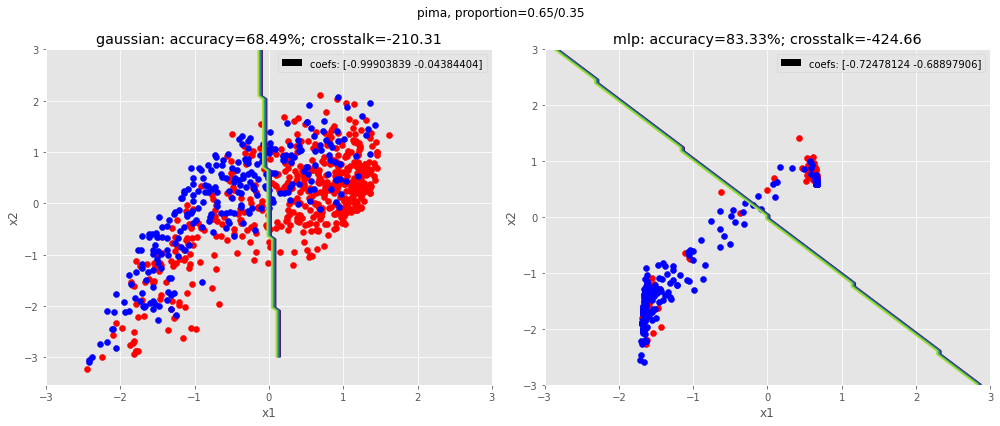

In [43]:
datasets = load_classification_datasets()
plot_hebbian_surface(datasets)